In [10]:
car_data = (r'C:\Users\DELL\Downloads\ai_nov21-main\ai_nov21\Chapter 2\06. Trees\car data.csv')

In [11]:
import pandas as pd
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [12]:
columns = ['buying','maint','doors','persons','lug_boot','safety','class1']

In [13]:
df = pd.read_csv(car_data, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class1
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [14]:
df['class1'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class1, dtype: int64

In [15]:
len(df['class1'].unique())

4

In [16]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class1      object
dtype: object

In [17]:
df.buying=df.buying.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
df.maint=df.maint.replace({'low':0, 'med':1, 'high':2, 'vhigh':3})
df.doors=df.doors.replace({'2':0, '3':1, '4':2, '5more':3})
df.persons=df.persons.replace({'2':0, '4':1, 'more':2})
df.lug_boot=df.lug_boot.replace({'small':0, 'med':1, 'big':2})
df.safety=df.safety.replace({'low':0, 'med':1, 'high':2})
df.class1 = df.class1.replace({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

In [25]:
df.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class1      int64
dtype: object

In [18]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class1
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


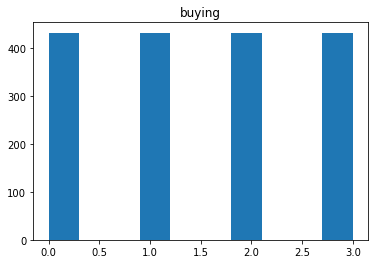

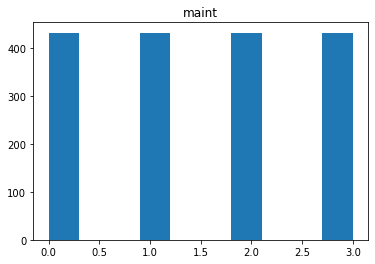

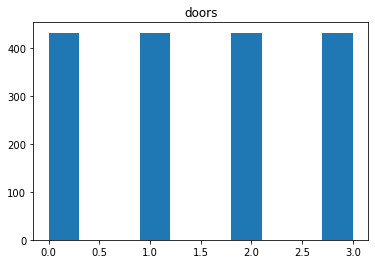

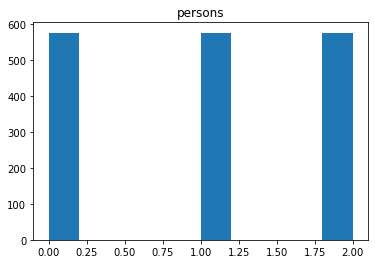

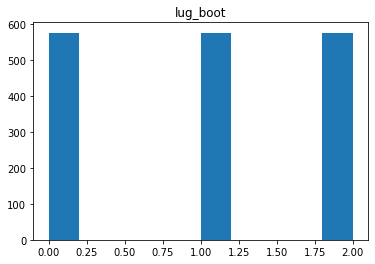

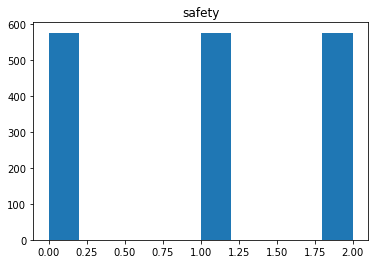

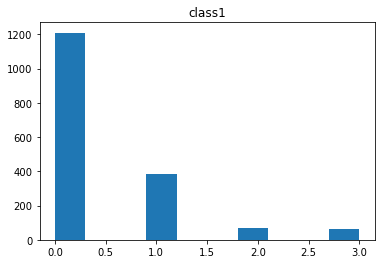

In [19]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [20]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [23]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

In [28]:
y_pred = dt_clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 1,
       3, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2,
       3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 2, 3, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0,

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9672447013487476


[Text(498.8826219512195, 784.0384615384615, 'safety <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(488.6753048780488, 721.3153846153846, 'gini = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(509.0899390243902, 721.3153846153846, 'persons <= 0.5\ngini = 0.576\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(498.8826219512195, 658.5923076923077, 'gini = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(519.297256097561, 658.5923076923077, 'buying <= 1.5\ngini = 0.628\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(267.9420731707317, 595.8692307692307, 'maint <= 0.5\ngini = 0.646\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = acc'),
 Text(94.41768292682927, 533.1461538461538, 'safety <= 1.5\ngini = 0.612\nsamples = 65\nvalue = [3, 9, 35, 18]\nclass = vgood'),
 Text(51.036585365853654, 470.4230769230769, 'lug_boot <= 0.5\ngini = 0.456\nsamples = 31\nvalue = [1, 9, 21, 0]\n

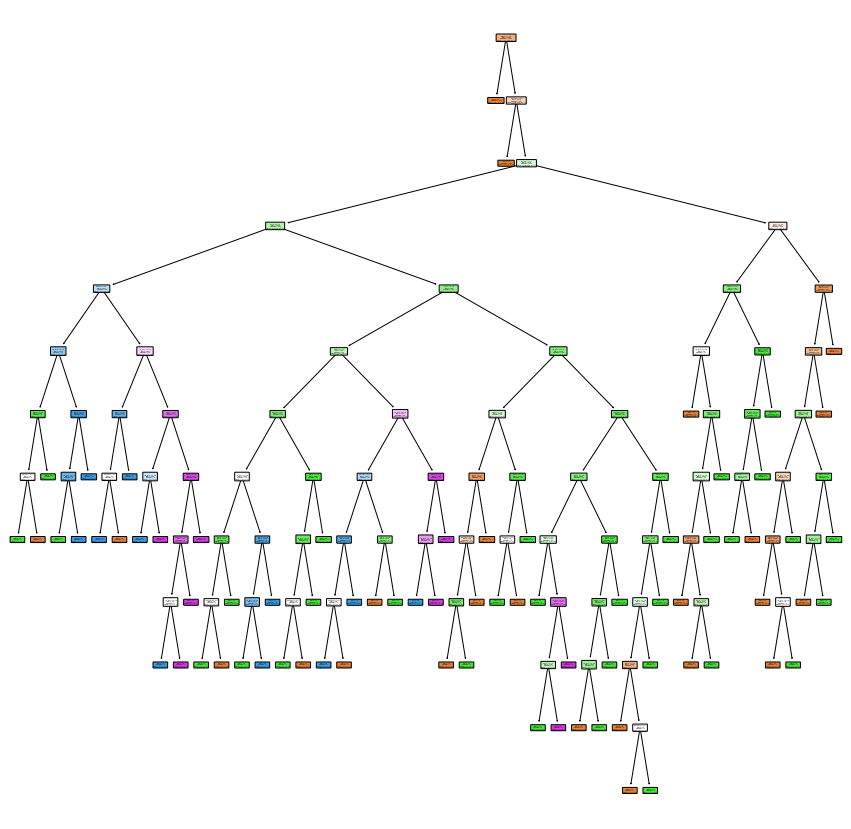

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['unacc', 'acc', 'vgood', 'good'],
         feature_names=X.columns)

C:\Users\DELL\anaconda3\envs\vishwa\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


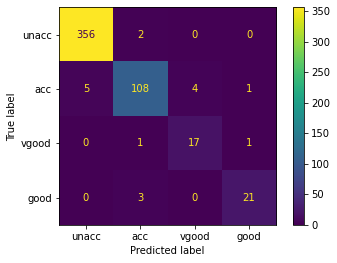

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['unacc', 'acc', 'vgood', 'good'])